In [1]:
from datasets import load_dataset
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from tokenizers import Tokenizer
from pathlib import Path

In [2]:
ds = load_dataset("jxie/coco_captions",streaming=True)

Resolving data files:   0%|          | 0/182 [00:00<?, ?it/s]

In [3]:
ds

IterableDatasetDict({
    train: IterableDataset({
        features: ['image', 'filename', 'cocoid', 'caption'],
        num_shards: 182
    })
    validation: IterableDataset({
        features: ['image', 'filename', 'cocoid', 'caption'],
        num_shards: 10
    })
    test: IterableDataset({
        features: ['image', 'filename', 'cocoid', 'caption'],
        num_shards: 9
    })
})

{'caption': 'A woman wearing a net on her head cutting a cake. ',
 'cocoid': 522418,
 'filename': 'COCO_val2014_000000522418.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x799396D1DA90>}
Image Shape: (480, 640, 3)
--------------------------------------------------


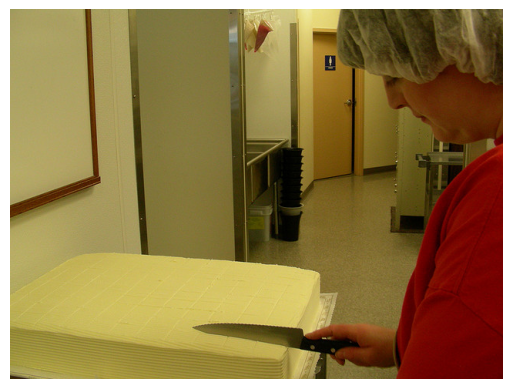

In [4]:
for sample in ds['train'].take(1):
    pprint(sample)
    print(f'Image Shape: {np.array(sample['image']).shape}')
    plt.imshow(sample['image'])
    plt.axis('off')
    print("-" * 50)

In [5]:
def get_tokenizer(tokenizer_path=None):
    """
    Load custom BPE tokenizer.

    Args:
        tokenizer_path: Path to tokenizer.json file.
                       Defaults to tokenizer/bpe_tokenizer.json
    """
    if tokenizer_path is None:
        # Default path relative to project root
        tokenizer_path = Path.cwd().parent / "bpe_tokenizer.json"

    tokenizer_path = Path(tokenizer_path)

    if not tokenizer_path.exists():
        raise FileNotFoundError(
            f"Tokenizer not found at {tokenizer_path}. "
            "Run notebooks/build_tokenizer.ipynb first."
        )

    tokenizer = Tokenizer.from_file(str(tokenizer_path))
    print(f"Loaded tokenizer from {tokenizer_path}")
    print(f"Vocab size: {tokenizer.get_vocab_size()}")

    return tokenizer

tokenizer = get_tokenizer()

Loaded tokenizer from /home/smedar/code_files/llama4-from-scratch/vision_language_alignment/bpe_tokenizer.json
Vocab size: 32000


In [6]:
# Check caption token lengths in your data
lengths = []
for i, sample in enumerate(ds['train'].take(50000)):
    tokens = tokenizer.encode(sample['caption']).ids
    lengths.append(len(tokens))
    
print(f"Max: {max(lengths)}")
print(f"Mean: {sum(lengths)/len(lengths):.1f}")
print(f"95th percentile: {sorted(lengths)[950]}")


Max: 66
Mean: 12.2
95th percentile: 8
